In [5]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from src.features.aggregation import all_regions

# get a random date where occ_protest is 1 in a random region
dfs = all_regions(ignore_group=True, protest_source="acled")
region = np.random.randint(0, len(dfs))
region_name, df_w = dfs[region]
date_ = df_w[df_w.occ_protest == 1].sample(1).index[0]

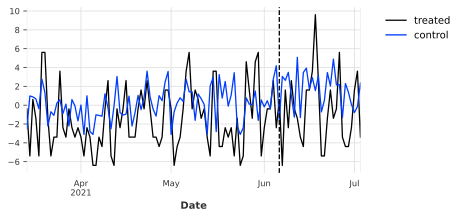

In [7]:
from src.models.synthetic_control import synthetic_control

y, y_c = synthetic_control(region_name, date_)
fig, ax = plt.subplots(figsize=(6, 3))

y.plot(ax=ax, label="treated")
y_c.plot(ax=ax, label="control")
ax.set_xlabel("Date")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axvline(date_, color="black", linestyle="--")
plt.show()

  0%|          | 0/894 [00:00<?, ?it/s]

No control regions for Bayern on 2021-03-19 00:00:00
No control regions for Berlin on 2021-03-19 00:00:00
No control regions for Brandenburg on 2021-03-19 00:00:00
No control regions for Hamburg on 2021-03-19 00:00:00
No control regions for Hessen on 2021-03-19 00:00:00
No control regions for Niedersachsen on 2021-03-19 00:00:00
No control regions for Nordrhein-Westfalen on 2021-03-19 00:00:00
No control regions for Rheinland-Pfalz on 2021-03-19 00:00:00
No control regions for Saarland on 2021-03-19 00:00:00
No control regions for Sachsen on 2021-03-19 00:00:00
No control regions for Sachsen-Anhalt on 2021-03-19 00:00:00
No control regions for Schleswig-Holstein on 2021-03-19 00:00:00
No control regions for Thüringen on 2021-03-19 00:00:00


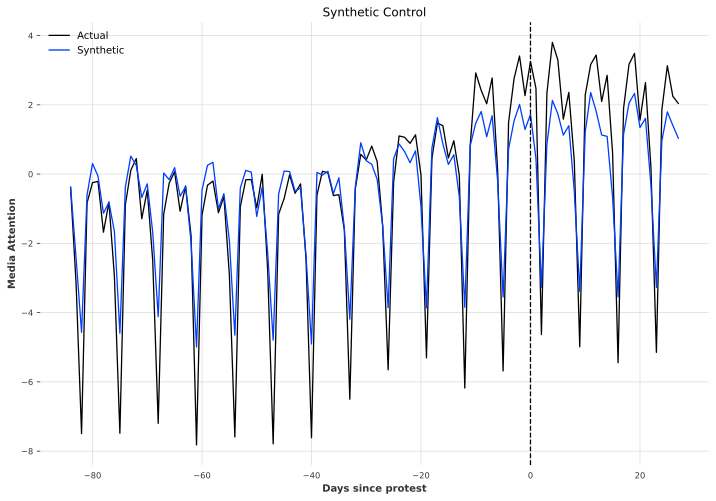

In [8]:
from src.models.synthetic_control import compute_synthetic_controls

ys, y_cs = compute_synthetic_controls(rolling=1, scale="demean", n_jobs=4)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ys.index, ys.mean(axis=1), label="Actual")
ax.plot(y_cs.index, y_cs.mean(axis=1), label="Synthetic")
ax.legend()
ax.set_title("Synthetic Control")
ax.set_ylabel("Media Attention")
ax.set_xlabel("Days since protest")
ax.axvline(0, color="black", linestyle="--")
plt.show()